enter kernel::5


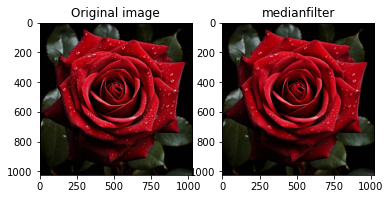

In [28]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread('rose5.jpg')
image=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
kernel=int(input("enter kernel::"))
median_filter=cv2.medianBlur(image,kernel)
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original image")
plt.subplot(1,2,2)
plt.imshow(median_filter)
plt.title("medianfilter")
plt.show()

In [2]:
#medianfilter correct one 
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [3]:
def read_image_file(root_directory):
    filename = input("Enter a image file name :: ")
    filepath = os.path.join(root_directory, filename)
    img = cv2.imread(filepath)
    return img

In [4]:
def convert_grayscale(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray_image

In [5]:
# Display gray images
def display_gray_images(img, title):
    plt.imshow(img, cmap = 'gray')
    plt.title(title)

In [6]:
# Display RGB images
def display_color_images(img, title):
    plt.imshow(img)
    plt.title(title)

In [7]:
# Apply median filter
def apply_median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

In [8]:
def find_median(arr):
    n = len(arr)
    arr.sort()
    if n % 2 == 0:
        median = (arr[n // 2 - 1] + arr[n // 2]) / 2
    else:
        median = arr[n // 2]
    return median

In [9]:
def median_filter_custom(img, kernel_size):
    rows, cols = img.shape
    pad_size = kernel_size // 2
    padded_img = np.pad(img, pad_size, mode='constant', constant_values=0)
    
    modified_image = np.zeros((rows, cols))
    
    for i in range(rows):
        for j in range(cols):
            neighbours = []
            for p in range(-pad_size, pad_size + 1):
                for q in range(-pad_size, pad_size + 1):
                    neighbours.append(padded_img[i + pad_size + p, j + pad_size + q])
                    
            modified_image[i, j] = find_median(neighbours)
    
    return modified_image

Enter a image file name :: rose.jpeg
Enter kernel size :: 9


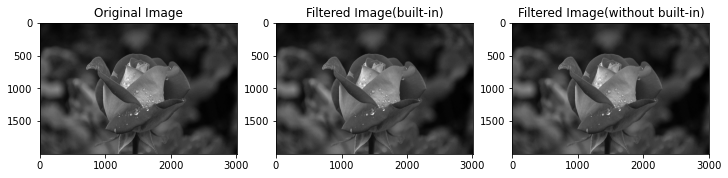

In [14]:
original_image = read_image_file('image')
if original_image is None:
    print("Failed to load image")
else:
    gray_image = convert_grayscale(original_image)
    kernel_size = int(input("Enter kernel size :: "))
    filtered_image1 = apply_median_filter(gray_image, kernel_size)
    filtered_image2 = median_filter_custom(gray_image, kernel_size)


    plt.figure(figsize=(12, 8))
    plt.subplot(1, 3, 1)
    display_gray_images(gray_image, 'Original Image')

    plt.subplot(1, 3, 2)
    display_gray_images(filtered_image1, 'Filtered Image(built-in)')
    
    plt.subplot(1, 3, 3)
    display_gray_images(filtered_image2, 'Filtered Image(without built-in)')

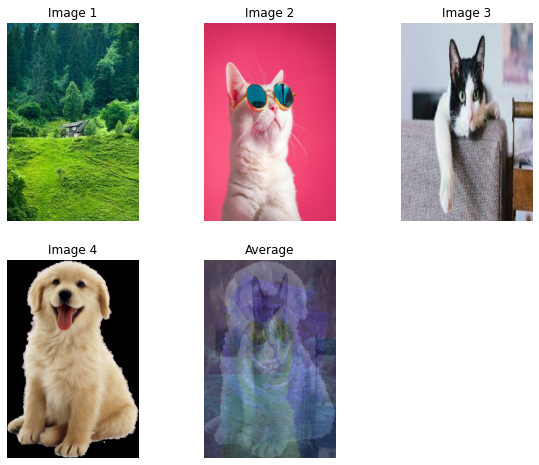

In [22]:
#average of set of images
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the five images
img1 = cv2.imread('nature.jpg')
img2 = cv2.imread('cat1.jpg')
img3 = cv2.imread('cat.jpg')
img4 = cv2.imread('puppy.jpg')
img5 = cv2.imread('rose5.jpg')

# Get the dimensions of the first image
height, width, channels = img1.shape

# Resize the images to match the dimensions of the first image
img2 = cv2.resize(img2, (width, height))
img3 = cv2.resize(img3, (width, height))
img4 = cv2.resize(img4, (width, height))
img5 = cv2.resize(img5, (width, height))

# Convert images to numpy arrays
images = [img1, img2, img3, img4, img5]
images_array = np.array(images)
plt.figure(figsize=(10,8))
# Calculate the average pixel values
average_image = np.zeros((height, width, channels), dtype=np.uint8)
for i in range(height):
    for j in range(width):
        for k in range(channels):
            sum_1 = 0
            for img in images_array:
                sum_1 += img[i, j, k]
            average_image[i, j, k] = sum_1 // len(images_array)
for i, img in enumerate(images, start=1):
    plt.subplot(2, 3, i)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Image {i}")
    plt.axis('off')

# Display or save the average image
plt.imshow(average_image)
plt.title("Average")
plt.show()

In [23]:
#correct average of set of images
def resize_image(image, target_size):
    resized_image = cv2.resize(image, target_size)
    return resized_image

In [24]:
def average_images(image_list, target_size):
    avg_image = np.zeros(target_size, dtype=np.float32)
    
    # Sum all images
    for path in image_list:
        img = resize_image(path, target_size).astype(np.float32)
        avg_image += img

    # Divide by the number of images to get the average
    avg_image /= len(image_list)
    
    # Convert back to uint8
    avg_image = np.clip(avg_image, 0, 255).astype(np.uint8)
    
    return avg_image

Enter no of images :: 5
Enter a image file name :: sunflower.jpg
Enter a image file name :: royal.jpg
Enter a image file name :: kitten.jpg
Enter a image file name :: icecream.jpg
Enter a image file name :: dog.jpg


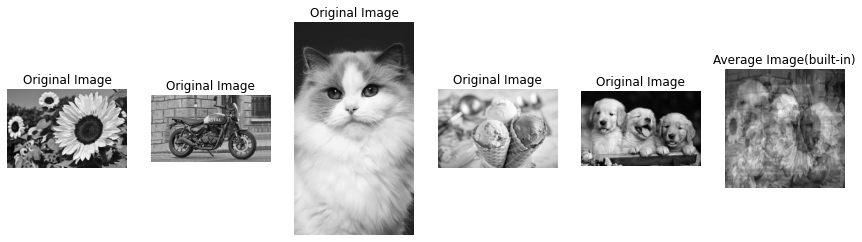

In [27]:
imgList = []
n = int(input("Enter no of images :: "))
for i in range(n): 
    original_image = read_image_file("Image")
    if original_image is None:
        print("Failed to load image")
    else:
        gray_image = convert_grayscale(original_image)
        imgList.append(gray_image)
        
target_size = (512, 512)  # You can set this to any size you prefer

average_image1 = average_images(imgList, target_size)
# average_img2 = find_average_image(imgList)


plt.figure(figsize=(15, 5))

for i in range(n + 1): 
    ax = plt.subplot(1, n + 1, i+1)
    plt.axis('off')
    if i != n :
        display_gray_images(imgList[i], 'Original Image')
    else:
        display_gray_images(average_image1, 'Average Image(built-in)')
    
# plt.subplot(1, 3, 3)
# display_gray_images(filtered_image2, 'Filtered Image(without built-in)')



In [ ]:
#difference of two image
def difference_img(img1,img2):
    resized_img1 = cv2.resize(img1, (img2.shape[1], img2.shape[0]))
    difference_img=cv2.subtract(img1,img2)
    return difference_img

In [ ]:
org_img1= read_image_file('image')
org_img2= read_image_file('image')
if org_img1 is None:
    print("Failed to load image1")
elif org_img2 is None:
    print("Failed to load image2")
else:

In [38]:
import cv2
img1=cv2.imread('img1.jpg')
img2=cv2.imread('img2.jpg')

rows, cols = img2.shape[:2]

img1=cv2.resize(img1,(cols,rows))
diff=cv2.subtract(img2,img1)

cv2.imshow('diff',diff)
cv2.waitKey(0)
cv2.destroyAllWindows()
